# imports

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from statsmodels.tsa.seasonal import seasonal_decompose

# Dataset

In [2]:
data = pd.read_csv("Market Basket Analysis.csv")

C:\Users\yk959\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [4]:
data.dtypes

BillNo         object
Itemname       object
Quantity        int64
Date           object
Price         float64
CustomerID    float64
Country        object
dtype: object

In [5]:
data.shape

(522064, 7)

In [6]:
data.size

3654448

In [7]:
data.columns

Index(['BillNo', 'Itemname', 'Quantity', 'Date', 'Price', 'CustomerID',
       'Country'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      522064 non-null  object 
 1   Itemname    520609 non-null  object 
 2   Quantity    522064 non-null  int64  
 3   Date        522064 non-null  object 
 4   Price       522064 non-null  float64
 5   CustomerID  388023 non-null  float64
 6   Country     522064 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [9]:
data.describe 

<bound method NDFrame.describe of         BillNo                             Itemname  Quantity  \
0       536365   WHITE HANGING HEART T-LIGHT HOLDER         6   
1       536365                  WHITE METAL LANTERN         6   
2       536365       CREAM CUPID HEARTS COAT HANGER         8   
3       536365  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4       536365       RED WOOLLY HOTTIE WHITE HEART.         6   
...        ...                                  ...       ...   
522059  581587          PACK OF 20 SPACEBOY NAPKINS        12   
522060  581587          CHILDREN'S APRON DOLLY GIRL         6   
522061  581587         CHILDRENS CUTLERY DOLLY GIRL         4   
522062  581587      CHILDRENS CUTLERY CIRCUS PARADE         4   
522063  581587         BAKING SET 9 PIECE RETROSPOT         3   

                    Date  Price  CustomerID         Country  
0       01-12-2010 08:26   2.55     17850.0  United Kingdom  
1       01-12-2010 08:26   3.39     17850.0  United Kingdom  

In [10]:
data.isna()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
522059,False,False,False,False,False,False,False
522060,False,False,False,False,False,False,False
522061,False,False,False,False,False,False,False
522062,False,False,False,False,False,False,False


# EDA

In [11]:
sns.set(style="darkgrid", color_codes=True)
pd.set_option('display.max_columns', 75)

In [12]:
data.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [13]:
data

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [14]:
#find  the sale
data["Sales"] = data["Quantity"] * data["Price"]
data


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Sales
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France,10.20
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France,12.60
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France,16.60
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France,16.60


In [15]:
data.dtypes

BillNo         object
Itemname       object
Quantity        int64
Date           object
Price         float64
CustomerID    float64
Country        object
Sales         float64
dtype: object

In [16]:
data["Date"] = pd.to_datetime(data["Date"])

# Top 20 frequent items 

In [17]:
top20items = pd.DataFrame(data["Itemname"].value_counts().head(20))
top20items = top20items.reset_index()
top20items.columns = ["Itemname","Frequency"]
labels = top20items["Itemname"]
sizes = top20items["Frequency"]
top20items

,Itemname,Frequency
0,WHITE HANGING HEART T-LIGHT HOLDER,2269
1,JUMBO BAG RED RETROSPOT,2087
2,REGENCY CAKESTAND 3 TIER,1930
3,PARTY BUNTING,1677
4,LUNCH BAG RED RETROSPOT,1570
5,ASSORTED COLOUR BIRD ORNAMENT,1465
6,SET OF 3 CAKE TINS PANTRY DESIGN,1360
7,PACK OF 72 RETROSPOT CAKE CASES,1328
8,LUNCH BAG BLACK SKULL.,1315
9,NATURAL SLATE HEART CHALKBOARD,1246


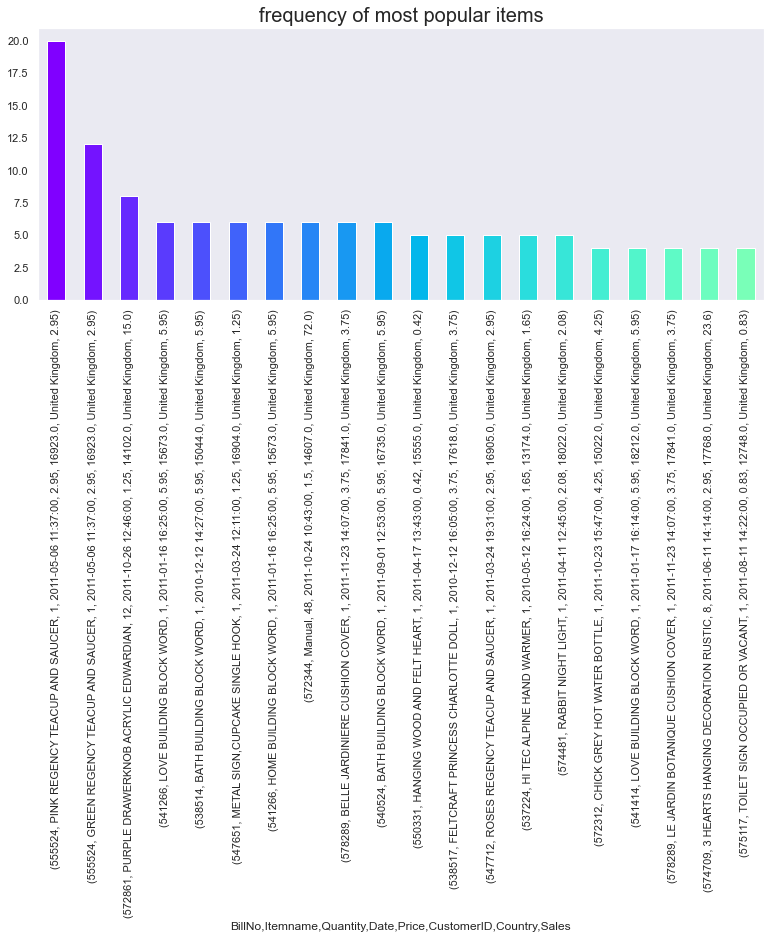

In [18]:
color = plt.cm.rainbow(np.linspace(0, 1, 40))
data.value_counts().head(20).plot.bar(color = color, figsize=(13,5))
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

Text(0.5, 1.0, 'Top 20 Products')

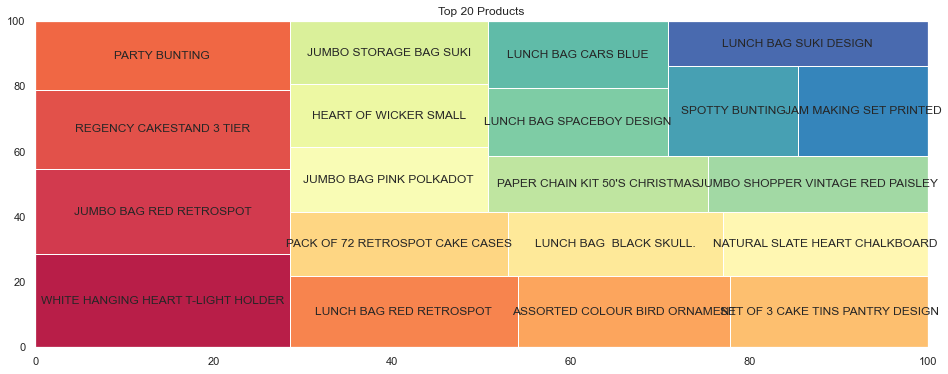

In [19]:
# top 20 choise of customer 

fig = plt.figure(figsize=(16,6))
colors = sns.color_palette("Spectral",20)
squarify.plot(sizes, label=labels, color =  colors)
plt.title("Top 20 Products")

In [20]:
t_light = data[data["Itemname"]== "WHITE HANGING HEART T-LIGHT HOLDER"]
t_light

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Sales
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30
49,536373,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 09:02:00,2.55,17850.0,United Kingdom,15.30
66,536375,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 09:32:00,2.55,17850.0,United Kingdom,15.30
218,536390,WHITE HANGING HEART T-LIGHT HOLDER,64,2010-01-12 10:19:00,2.55,17511.0,United Kingdom,163.20
253,536394,WHITE HANGING HEART T-LIGHT HOLDER,32,2010-01-12 10:39:00,2.55,13408.0,United Kingdom,81.60
...,...,...,...,...,...,...,...,...
517571,581246,WHITE HANGING HEART T-LIGHT HOLDER,1,2011-08-12 10:59:00,2.95,15453.0,United Kingdom,2.95
517606,581253,WHITE HANGING HEART T-LIGHT HOLDER,2,2011-08-12 11:15:00,2.95,16891.0,United Kingdom,5.90
518122,581356,WHITE HANGING HEART T-LIGHT HOLDER,6,2011-08-12 12:28:00,2.95,17830.0,United Kingdom,17.70
520160,581452,WHITE HANGING HEART T-LIGHT HOLDER,32,2011-08-12 18:03:00,2.55,17675.0,United Kingdom,81.60


<AxesSubplot:xlabel='Date', ylabel='Quantity'>

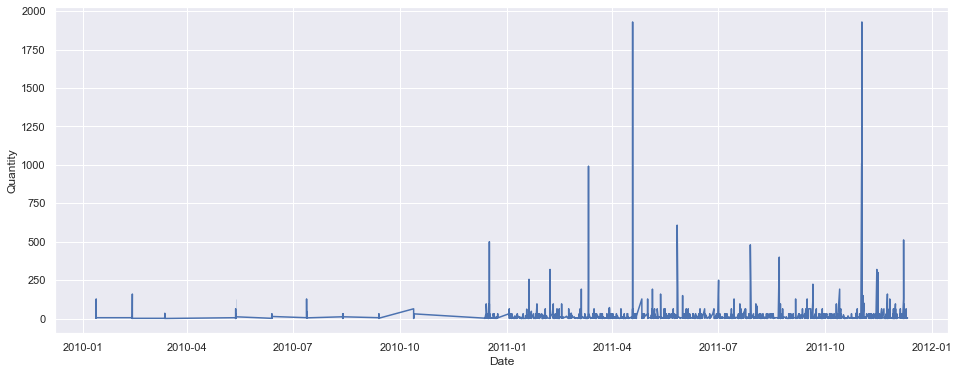

In [21]:
fig = plt.figure(figsize=(16,6))
sns.lineplot(x = t_light["Date"], y = t_light["Quantity"] )
# most of them have been sold in 2011. 

In [22]:
startdate = t_light["Date"] >= "20110101"
t_light_2011 = t_light.loc[startdate]
t_light_2011.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Sales
41255,539993,WHITE HANGING HEART T-LIGHT HOLDER,12,2011-04-01 10:00:00,2.95,13313.0,United Kingdom,35.40
41400,540014,WHITE HANGING HEART T-LIGHT HOLDER,6,2011-04-01 11:34:00,2.95,14606.0,United Kingdom,17.70
41448,540016,WHITE HANGING HEART T-LIGHT HOLDER,10,2011-04-01 11:42:00,2.95,16282.0,United Kingdom,29.50
41787,540026,WHITE HANGING HEART T-LIGHT HOLDER,1,2011-04-01 13:25:00,5.91,NaN,United Kingdom,5.91
42168,540033,WHITE HANGING HEART T-LIGHT HOLDER,32,2011-04-01 14:12:00,2.55,13680.0,United Kingdom,81.60


C:\Users\yk959\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Date', ylabel='Sales'>

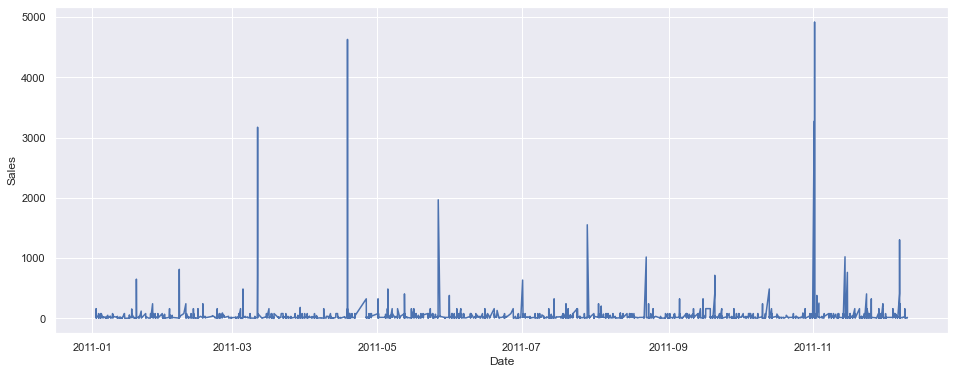

In [23]:
plt.figure(figsize=(16,6))
sns.lineplot(t_light_2011["Date"],t_light_2011["Sales"])

In [25]:
# sale according to country 

country_specific = data.groupby(["Country"]).sum().reset_index()
country_specific = country_specific.sort_values(["Sales"], ascending = False)
country_specific_10 = country_specific.head(10)
country_specific_10

,Country,Quantity,Price,CustomerID,Sales
28,United Kingdom,4526862,1845443.914,5.510928e+09,9003097.964
16,Netherlands,200937,6247.730,3.407895e+07,285446.340
6,Germany,119263,33532.140,1.143723e+08,228867.140
5,France,112104,36992.790,1.057630e+08,209715.110
0,Australia,84209,3612.500,1.475853e+07,138521.310
23,Spain,27951,9504.340,3.208028e+07,61577.110
25,Switzerland,30630,6634.360,2.332474e+07,57089.900
3,Belgium,23237,7372.850,2.524670e+07,41196.340
24,Sweden,36083,1695.790,6.637579e+06,38378.330
12,Japan,26016,657.210,4.095425e+06,37416.370


C:\Users\yk959\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Sales (millions)')

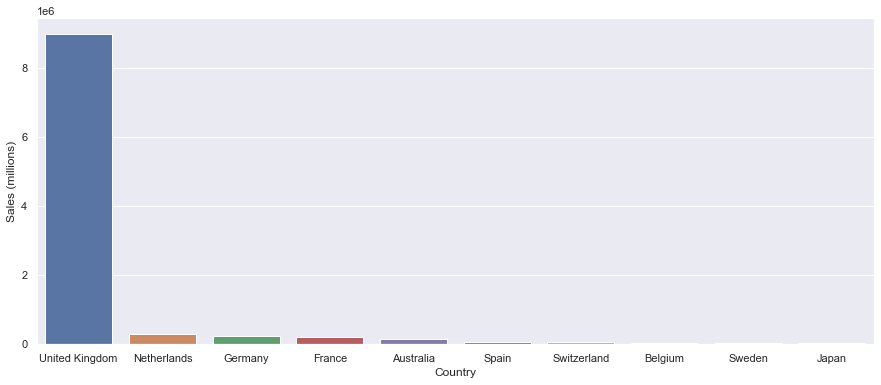

In [26]:
plt.figure(figsize=(15,6))
p = sns.barplot(country_specific_10["Country"], country_specific_10["Sales"])
p.set_ylabel("Sales (millions)")

In [27]:

basket = data.groupby(["BillNo","Itemname"])["Quantity"].sum().unstack().reset_index().fillna(0).set_index("BillNo")
basket

Itemname,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 PINK HEN+CHICKS IN BASKET,12 PINK ROSE PEG PLACE SETTINGS,12 RED ROSE PEG PLACE SETTINGS,15 PINK FLUFFY CHICKS IN BOX,15CM CHRISTMAS GLASS BALL 20 LIGHTS,16 PC CUTLERY SET PANTRY DESIGN,16 PIECE CUTLERY SET PANTRY DESIGN,18PC WOODEN CUTLERY SET DISPOSABLE,2 DAISIES HAIR COMB,2 PICTURE BOOK EGGS EASTER BUNNY,2 PICTURE BOOK EGGS EASTER CHICKS,2 PICTURE BOOK EGGS EASTER DUCKS,20 DOLLY PEGS RETROSPOT,200 BENDY SKULL STRAWS,200 RED + WHITE BENDY STRAWS,20713 wrongly marked,3 BIRDS CANVAS SCREEN,3 BLACK CATS W HEARTS BLANK CARD,3 DRAWER ANTIQUE WHITE WOOD CABINET,3 GARDENIA MORRIS BOXED CANDLES,3 HEARTS HANGING DECORATION RUSTIC,...,sold in set?,sold with wrong barcode,stock check,stock creditted wrongly,taig adjust,taig adjust no stock,temp adjustment,test,throw away,thrown away,thrown away-can't sell,thrown away-can't sell.,to push order througha s stock was,water damage,water damaged,website fixed,wet,wet boxes,wet damaged,wet pallet,wet rusty,wet/rusty,wet?,wrong barcode,wrong barcode (22467),wrong code,wrong code?,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
BillNo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
572058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

# one_hot_encoding

In [28]:
def one_hot_encoding(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket = basket.applymap(one_hot_encoding)
basket

Itemname,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 PINK HEN+CHICKS IN BASKET,12 PINK ROSE PEG PLACE SETTINGS,12 RED ROSE PEG PLACE SETTINGS,15 PINK FLUFFY CHICKS IN BOX,15CM CHRISTMAS GLASS BALL 20 LIGHTS,16 PC CUTLERY SET PANTRY DESIGN,16 PIECE CUTLERY SET PANTRY DESIGN,18PC WOODEN CUTLERY SET DISPOSABLE,2 DAISIES HAIR COMB,2 PICTURE BOOK EGGS EASTER BUNNY,2 PICTURE BOOK EGGS EASTER CHICKS,2 PICTURE BOOK EGGS EASTER DUCKS,20 DOLLY PEGS RETROSPOT,200 BENDY SKULL STRAWS,200 RED + WHITE BENDY STRAWS,20713 wrongly marked,3 BIRDS CANVAS SCREEN,3 BLACK CATS W HEARTS BLANK CARD,3 DRAWER ANTIQUE WHITE WOOD CABINET,3 GARDENIA MORRIS BOXED CANDLES,3 HEARTS HANGING DECORATION RUSTIC,...,sold in set?,sold with wrong barcode,stock check,stock creditted wrongly,taig adjust,taig adjust no stock,temp adjustment,test,throw away,thrown away,thrown away-can't sell,thrown away-can't sell.,to push order througha s stock was,water damage,water damaged,website fixed,wet,wet boxes,wet damaged,wet pallet,wet rusty,wet/rusty,wet?,wrong barcode,wrong barcode (22467),wrong code,wrong code?,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
BillNo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572057,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
572058,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A563185,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Association rules

In [29]:
#frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)
frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)

In [30]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [31]:
rules = rules.sort_values("lift", ascending = False)

In [32]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
156,(PINK REGENCY TEACUP AND SAUCER),"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",0.036418,0.036170,0.025482,0.699728,19.345428,0.024165,3.209858
153,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",(PINK REGENCY TEACUP AND SAUCER),0.036170,0.036418,0.025482,0.704514,19.345428,0.024165,3.261013
154,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.028204,0.048243,0.025482,0.903509,18.728115,0.024122,9.863659
155,(GREEN REGENCY TEACUP AND SAUCER),"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",0.048243,0.028204,0.025482,0.528205,18.728115,0.024122,2.059785
24,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.048243,0.036418,0.029936,0.620513,17.038810,0.028179,2.539170
...,...,...,...,...,...,...,...,...,...
149,(WHITE HANGING HEART T-LIGHT HOLDER),(WOODEN PICTURE FRAME WHITE FINISH),0.108956,0.054033,0.020040,0.183924,3.403936,0.014152,1.159165
130,(WHITE HANGING HEART T-LIGHT HOLDER),(NATURAL SLATE HEART CHALKBOARD),0.108956,0.060960,0.020336,0.186649,3.061823,0.013695,1.154532
131,(NATURAL SLATE HEART CHALKBOARD),(WHITE HANGING HEART T-LIGHT HOLDER),0.060960,0.108956,0.020336,0.333604,3.061823,0.013695,1.337109
80,(JUMBO BAG RED RETROSPOT),(WHITE HANGING HEART T-LIGHT HOLDER),0.102128,0.108956,0.021870,0.214147,1.965448,0.010743,1.133856
